Recently, I was reading through [A/B Testing with Machine Learning - A Step-by-Step Tutorial](https://www.business-science.io/business/2019/03/11/ab-testing-machine-learning.html) written by [Matt Dancho](https://www.linkedin.com/in/mattdancho/) of [Business Science](https://www.business-science.io). I was always fascinated by the idea of **A/B Testing** and the amount of impact it can bring in businesses. The tutorial is very definitive, and Matt has explained every step in the tutorial. He has detailed each decision taken while developing the solution.

Even though the tutorial is written in `R`, I was able to scram through his code, and my knowledge of Data Science helped me to understand the concepts very quickly. I will have to thank Matt for putting together all the key ingredients of the Data Science world and or using them to solve a real problem.

I decided to replicate the solution in `Python`. However, there are some minor differences in my implementation, but it can be ignored. Apart from cell annotations, I have not detailed any of the steps because, for that, you really should follow the article I mentioned.

In [1]:
# Import Dataset.
import pandas as pd

control_data = pd.read_csv("data/control_data.csv")
experiment_data = pd.read_csv("data/experiment_data.csv")

In [2]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [3]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


### **Exploratory Data Analysis.**

In [4]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [5]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [6]:
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [7]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [8]:
control_data[control_data["Enrollments"].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


### **Data Preprocessing.**

In [9]:
# Combine with Experiment Data.
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
30,"Mon, Nov 10",10445,851,NaN,NaN
26,"Thu, Nov 6",9842,831,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
4,"Wed, Oct 15",9793,832,140.0,94.0
26,"Thu, Nov 6",9921,830,NaN,NaN
18,"Wed, Oct 29",9327,739,196.0,86.0
22,"Sun, Nov 2",8836,693,206.0,67.0
6,"Fri, Oct 17",9088,780,127.0,44.0
14,"Sat, Oct 25",8687,691,176.0,128.0


In [10]:
import numpy as np
np.random.seed(10)
import sklearn.utils

# Add row id.
data_total["row_id"] = data_total.index

# Create a Day of Week feature.
data_total["DOW"] = data_total["Date"].str.slice(start=0, stop=3)

# Remove Missing Data.
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote if the data was part of the experiment or not (Random).
data_total["Experiment"] = np.random.randint(2, size=len(data_total))

# Remove Missing Data.
data_total.dropna(inplace=True)

# Remove the Date and Payments columns.
del data_total["Date"], data_total["Payments"], data_total["row_id"]

# Shuffle the Data.
data_total = sklearn.utils.shuffle(data_total)

In [11]:
# Check the New Data.
data_total.head()

,Pageviews,Clicks,Enrollments,DOW,Experiment
9,10496,860,153.0,Mon,0
3,9871,836,156.0,Tue,1
3,9867,827,138.0,Tue,0
19,9308,728,207.0,Thu,1
2,10511,909,167.0,Mon,0


In [12]:
# Reorder the Columns.
data_total = data_total[["Experiment", "Pageviews", "Clicks", "DOW", "Enrollments"]]

In [13]:
# Split Dataset into Training and Test Set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_total.loc[:, data_total.columns != "Enrollments"], data_total["Enrollments"], test_size=0.2
)

In [14]:
# Encode Categorical Feature.
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train["DOW"] = lb.fit_transform(X_train["DOW"])
X_test["DOW"] = lb.transform(X_test["DOW"])

In [15]:
X_train.head()

,Experiment,Pageviews,Clicks,DOW
21,1,8448,695,2
20,0,8715,722,0
10,0,10660,867,5
11,1,9947,838,6
3,1,9871,836,5


In [16]:
X_test.head()

,Experiment,Pageviews,Clicks,DOW
11,0,9737,801,6
1,1,9288,785,3
16,1,9655,771,1
2,1,10480,884,1
2,0,10511,909,1


In [17]:
"""
Helper Functions.
    1. Function for printing the evaluation scores related to a regression problem.
    2. Function for plotting the original values and values predicted by the model.
"""

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print("RMSE Score: {}".format(rmse))
    print("R2_Squared: {}".format(r_sq))
    print("MAE Score: {}".format(mae))


import matplotlib.pyplot as plt
plt.style.use("ggplot")

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10, 5))
    original = plt.scatter(np.arange(1, N+1), y_test, c="blue")
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c="red")
    plt.xticks(np.arange(1, N+1))
    plt.xlabel("# Oberservation")
    plt.ylabel("Enrollments")
    title = "True labels vs. Predicted Labels ({})".format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ("Original", "Prediction"))
    plt.show()

### **Linear Regression: A Baseline.**

In [ ]:
import statsmodels.api as sm

linear_regression = sm.OLS(y_train, X_train)
linear_regression = linear_regression.fit()

y_preds = linear_regression.predict(X_test)

In [19]:
calculate_metrics(y_test, y_preds)

RMSE Score: 26.115894463227043
R2_Squared: 0.34181276189452925
MAE Score: 22.883481777465466


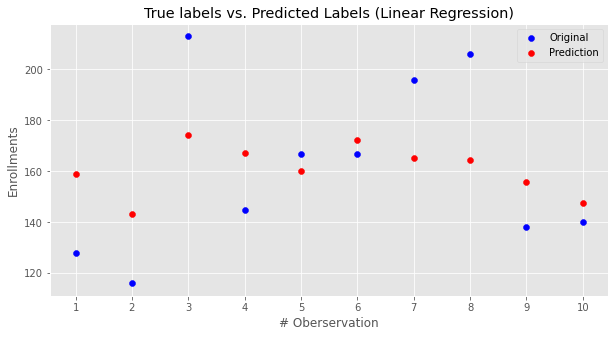

In [20]:
plot_preds(y_test, y_preds, "Linear Regression")

In [21]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              402.7
Date:                Sat, 02 Jul 2022   Prob (F-statistic):                    7.17e-27
Time:                        15:16:08   Log-Likelihood:                         -162.57
No. Observations:                  36   AIC:                                      333.1
Df Residuals:                      32   BIC:                                      339.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={"index":"Terms", 0:"p_value"})\
    .sort_values("p_value")

,Terms,p_value
1,Pageviews,0.000003
2,Clicks,0.000595
3,DOW,0.447358
0,Experiment,0.699492


### **Model 2: Decision Tree.**

In [23]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=7)
dtree.fit(X_train, y_train)

y_preds = dtree.predict(X_test)

In [24]:
calculate_metrics(y_test, y_preds)

RMSE Score: 31.00344780036898
R2_Squared: 0.07240236285975821
MAE Score: 21.885714285714286


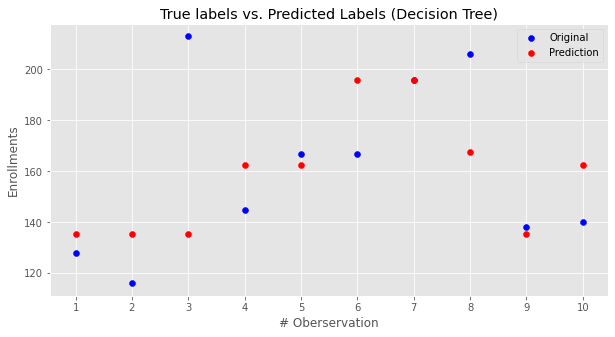

In [25]:
plot_preds(y_test, y_preds, "Decision Tree")

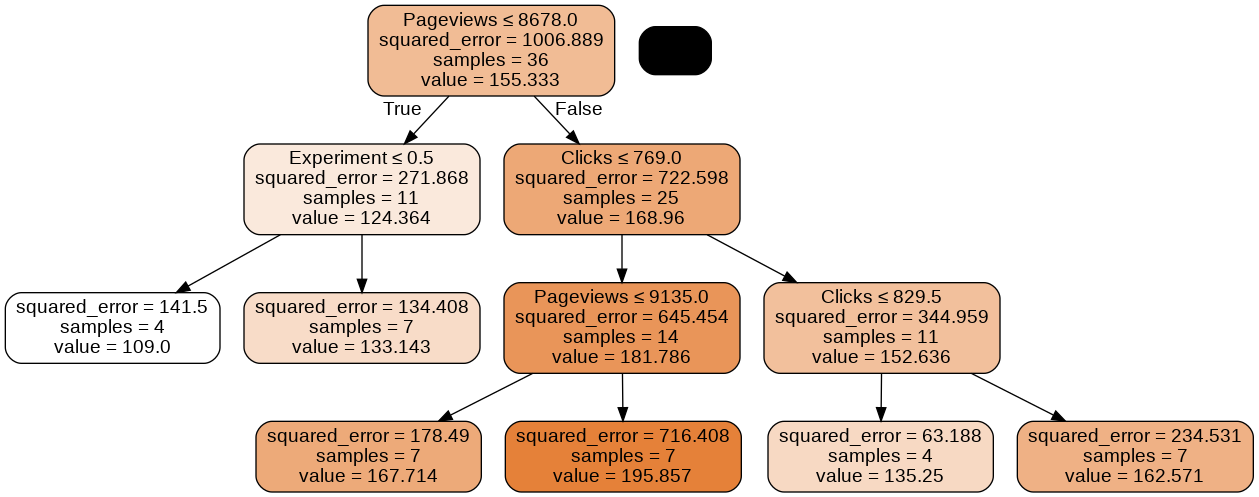

In [26]:
# Decision Tree Visualization.
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### **Model 3: XGBoost.**

In [ ]:
import xgboost as xgb

DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

xg_reg = xgb.train(params=parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

In [28]:
calculate_metrics(y_test, y_preds)

RMSE Score: 38.342637832021886
R2_Squared: -0.4187426425515284
MAE Score: 34.55235137939453


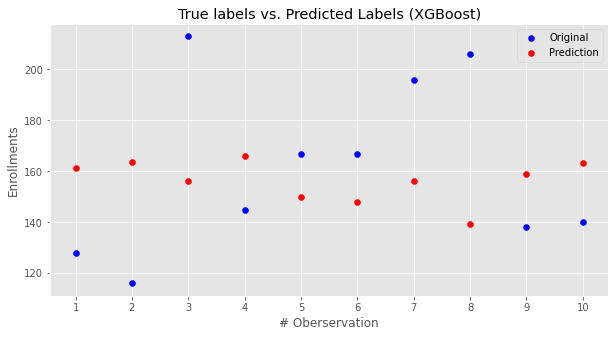

In [29]:
plot_preds(y_test, y_preds, "XGBoost")

### **Model 4: H2O.ai's AutoML.**

In [ ]:
!pip install h2o

In [31]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi6eemfer
  JVM stdout: /tmp/tmpi6eemfer/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi6eemfer/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_5cdssn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [32]:
X_train["Enrollments"] = y_train
X_test["Enrollments"] = y_test

In [33]:
X_train_h2o = h2o.H2OFrame(X_train)
X_test_h2o = h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
features = X_train.columns.values.tolist()
target = "Enrollments"

In [35]:
# Construct the AutoML Pipeline.
auto_h2o = H2OAutoML()
auto_h2o.train(x=features, y=target, training_frame=X_train_h2o)

AutoML progress: |█
15:16:27.421: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 36.0.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20220702_151624_model_155


Status of Neuron Layers: predicting Enrollments, regression, gaussian distribution, Quadratic loss, 121 weights/biases, 4.8 KB, 360,360 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,10.0,,,,,,,,,
1,,2,20,RectifierDropout,0.0,0.0,0.0,0.00782,0.006189,0.0,0.038531,1.085887,0.786226,0.789763
2,,3,1,Linear,,0.0,0.0,0.002861,0.001916,0.0,0.019641,1.375232,0.264822,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 293.00337955563776
RMSE: 17.117341486213267
MAE: 12.556330702348987
RMSLE: 0.1050982615148217
Mean Residual Deviance: 293.00337955563776

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 472.35843658878235
RMSE: 21.733808607530857
MAE: 14.53425438956361
RMSLE: 0.130714496655866
Mean Residual Deviance: 472.35843658878235

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,14.665536,3.888117,9.939384,17.085655,10.979776,17.052866,18.270000
1,mean_residual_deviance,480.808650,289.434660,176.601090,565.361500,179.540000,674.356600,808.183960
2,mse,480.808650,289.434660,176.601090,565.361500,179.540000,674.356600,808.183960
3,r2,0.416259,0.317026,-0.018241,0.593909,0.823656,0.387721,0.294251
4,residual_deviance,480.808650,289.434660,176.601090,565.361500,179.540000,674.356600,808.183960
5,rmse,20.972534,7.155542,13.289134,23.777332,13.399253,25.968378,28.428577
6,rmsle,0.127288,0.037967,0.087568,0.141692,0.085827,0.156649,0.164703



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-07-02 15:53:16,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-07-02 15:53:16,35 min 5.672 sec,120000 obs/sec,10.0,1,360.0,23.354959,545.454115,18.082586,0.458278
2,,2022-07-02 15:53:17,35 min 7.158 sec,242177 obs/sec,10010.0,1001,360360.0,17.117341,293.003380,12.556331,0.709001



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Pageviews,1.000000,1.000000,0.335989
1,Clicks,0.785108,0.785108,0.263788
2,DOW,0.735727,0.735727,0.247197
3,Experiment,0.455450,0.455450,0.153026


In [36]:
# Overview of how the models performed.
auto_h2o.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20220702_151624_model_155,21.7338,472.358,14.5343,0.130714,472.358
StackedEnsemble_BestOfFamily_4_AutoML_1_20220702_151624,22.7312,516.706,16.5524,0.136985,516.706
DeepLearning_grid_1_AutoML_1_20220702_151624_model_131,22.7415,517.176,17.8014,0.142084,517.176
DeepLearning_grid_1_AutoML_1_20220702_151624_model_91,23.255,540.796,18.1956,0.144556,540.796
DeepLearning_grid_1_AutoML_1_20220702_151624_model_65,23.3882,547.008,17.4482,0.159292,547.008
DeepLearning_grid_2_AutoML_1_20220702_151624_model_3,23.42,548.499,17.3273,0.140584,548.499
StackedEnsemble_BestOfFamily_6_AutoML_1_20220702_151624,23.7432,563.741,17.7337,0.141892,563.741
DeepLearning_grid_1_AutoML_1_20220702_151624_model_52,23.8029,566.579,18.5624,0.148637,566.579
DeepLearning_grid_1_AutoML_1_20220702_151624_model_83,23.9358,572.922,19.5253,0.148887,572.922
DeepLearning_grid_1_AutoML_1_20220702_151624_model_66,23.9651,574.326,19.7197,0.152691,574.326


In [37]:
# Extract the best model from the leaderboard.
auto_h2o = auto_h2o.leader

In [38]:
X_test_temp = X_test.copy()
del X_test_temp["Enrollments"]

In [39]:
# Employ the model to make the inference.
X_test_h2o_copy = h2o.H2OFrame(X_test_temp)
y_preds = auto_h2o.predict(X_test_h2o_copy)

# Convert the predictions to a native list.
y_preds = h2o.as_list(y_preds["predict"])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [40]:
calculate_metrics(y_test, y_preds)

RMSE Score: 37.99143624751606
R2_Squared: -0.3928715627162409
MAE Score: 32.47989239132142
